# Types of Data Munging
<img src="./photo/1.PNG", width=700>

# Data Mungingwith R(2)
# 데이터마이닝을 위한 데이터 - Customer Signature
<img src="./photo/2.PNG">

# 파생변수를 생성하는 일반적인 방법
 - 한 값으로부터 특징들을 추출한다.
  - 날짜로부터 요일을 계산
  - 신용카드 번호로부터 신용카드 발급자를 추출
 - 한 레코드 내의 값들을 결합한다.
  - 멤버십 가입일과 첫 구매일로부터 경과를 계산
 - 다른 테이블의 부가적인 정보를 참조한다.
  - 우편번호에 따른 인구와 평균가계수입
  - 상품코드에 대한 계층구조
 - 다수 필드 내에 시간 종속적인 데이터를 pivoting한다.
  - 월마다 한 행씩 저장되는 과금 데이터를 각각의 월에 대응하는 필드로 변환
 - 거래 레코드들을 요약한다.
  - 년간 총 구매액
 - Customer Signature 필드들을 요약한다.
  - 값의 표준화 및 서열화

# H백화점 데이터 (1/2)
<img src="././photo/3.PNG" width = 800>
<br>
<img src="././photo/4.PNG" width = 800>

# H백화점데이터로부터파생가능한변수
- 환불행태 
- 구매상품다양성
- 내점일수 & 내점당구매건수
- 구매주기
- 요일별구매패턴
- 연령대
- 기간별구매금액 & 횟수 
<font color='red'>
- 구매추세패턴  
- 가격선호도<br>
- 시즌선호도 <br>
- 상품별구매금액/횟수/여부 <br>
- 상품별구매순서 <br>
- 주구매상품 <br>
- 휴면/이탈여부</font><br>

## 파생변수 - 환불형태
### 1. H백화점 고객의 환불형태(금액,건수)에 대한 변수 생성.
 
<img src="././photo/5.PNG"  align="left">

In [1]:
install.packages("lubridate", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\Rtmpa00xqk\downloaded_packages


In [2]:
library(dplyr)
library(lubridate)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
cs <- read.delim("H(TSV)/HDS_Customers.tab",stringsAsFactors = F)
tr <- read.delim("H(TSV)/HDS_Transactions_MG.tab", stringsAsFactors = F)

In [5]:
str(tr)

'data.frame':	1726430 obs. of  18 variables:
 $ sales_date        : chr  "2000-05-01 00:00:00" "2000-05-01 00:00:00" "2000-05-01 00:00:00" "2000-05-01 00:00:00" ...
 $ sales_time        : int  920 940 940 1003 1013 1020 1020 1023 1030 1030 ...
 $ custid            : int  7595 36860 48385 29611 16457 27982 32036 6472 13301 21116 ...
 $ str_nm            : chr  "신촌점" "본점" "본점" "무역점" ...
 $ goodcd            : num  2.70e+12 2.70e+12 4.13e+12 4.51e+12 4.12e+12 ...
 $ brd_nm            : chr  "식품" "식품" "슈프리미아" "삼운/브로니" ...
 $ corner_nm         : chr  "주류" "차류" "화장잡화" "욕실용품" ...
 $ pc_nm             : chr  "일반식품" "일반식품" "장신구" "식기" ...
 $ part_nm           : chr  "공산품" "공산품파트" "잡화파트" "가정용품" ...
 $ team_nm           : chr  "식품팀" "식품팀" "잡화가용팀" "잡화가용팀" ...
 $ buyer_nm          : chr  "일반식품" "일반식품" "장신구" "조리욕실" ...
 $ import_flg        : int  0 0 0 1 0 0 0 0 1 1 ...
 $ tot_amt           : int  28000 59700 17000 14000 5800 34937 7000 46000 358000 19000 ...
 $ dis_amt           : int  0 0 0 700 290

In [6]:
cs.v1 <- tr %>% filter(net_amt < 0) %>% group_by(custid) %>% summarize(rf_amt = sum(net_amt),rf_cnt=n())

In [8]:
head(cs.v1[order(cs.v1$rf_amt),])

,custid,rf_amt,rf_cnt
1,49732,-85353770,46
2,32532,-72902000,3
3,45609,-72892750,51
4,47465,-66955550,40
5,35394,-62948060,59
6,46408,-50683350,38


## 파생변수–구매상품다양성
### 2. H백화점고객의구매상품다양성에대한변수생성
<img src="./photo/6.PNG"  align="left">

In [10]:
cs.v2 <- tr %>% distinct(custid,brd_nm) %>% group_by(custid) %>% summarize(buy_brd=n())
head(cs.v2)

,custid,buy_brd
1,1,23
2,2,16
3,3,30
4,4,6
5,5,4
6,6,14


## 파생변수–내점일수& 구매주기
### 3. H백화점 고객의 내점일수와 평균구매주기(Average Purchasing Interval)를 계산
<img src="./photo/7.PNG"  align="left">

In [12]:
start_date = ymd(ymd_hms(min(tr$sales_date)))
end_date = ymd(ymd_hms(max(tr$sales_date)))
start_date
end_date

[1] "2000-05-01"

[1] "2001-04-29"

In [13]:
cs.v3 <- tr %>% distinct(custid,sales_date) %>% group_by(custid) %>% summarize(visits=n()) %>% mutate(API = as.integer(end_date - start_date)/visits)
head(cs.v3)

,custid,visits,API
1,1.000000,41.000000,8.853659
2,2,11,33
3,3.00000,27.00000,13.44444
4,4.00,4.00,90.75
5,5,3,121
6,6.0,15.0,24.2


## 파생변수–내점당구매건수
### 4. 내점 당 구매건수(Number of Purchases Per Visit) 도출
<img src="./photo/8.PNG"  align="left">

In [14]:
tmp <- tr %>% group_by(custid) %>% summarize(n=n())
cs.v4 <- inner_join(cs.v3, tmp) %>% mutate(NPPV = n/visits) %>% select(custid,NPPV)
head(cs.v4)

Joining, by = "custid"


,custid,NPPV
1,1.000000,1.878049
2,2.000000,2.545455
3,3.000000,2.518519
4,4.0,1.5
5,5.000000,1.333333
6,6.000000,1.933333


## 파생변수–요일별구매패턴
### 5. H 백화점 고객의 주중•주말 구매 패턴에 대한 변수 생성
<img src="./photo/9.PNG"  align="left">

In [15]:
tmp <- tr %>% mutate(wk_amt = ifelse(wday(sales_date) %in% 2:6 ,net_amt,0), we_amt = ifelse(wday(sales_date) %in% c(1,7),net_amt,0)) %>% group_by(custid) 
tmp <- tmp %>% summarise_each(funs(sum),wk_amt,we_amt)    
cs.v5 <- tmp %>% mutate(wk_pat = ifelse(wk_amt>=we_amt*1.5,"주중형",ifelse(we_amt>=wk_amt*1.5,"주말형","유형없음")))  
head(cs.v5)

,custid,wk_amt,we_amt,wk_pat
1,1,2590892,1167489,주중형
2,2,1735009,326170,주중형
3,3,5742729,683320,주중형
4,4,254300,127000,주중형
5,5,129600,26100,주중형
6,6,460900,1556500,주말형


In [18]:
cs.v5_2 <- tmp %>% mutate(wk_pat = ifelse(wk_amt>=we_amt*1.5,"Weekdays",ifelse(we_amt>=wk_amt*1.5,"Weekends","No Type")))  

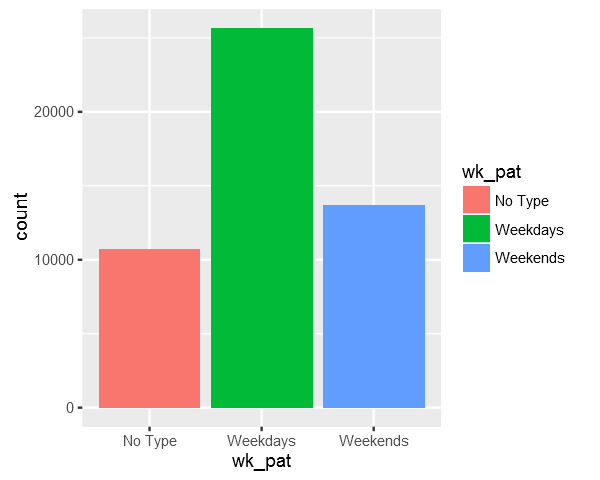

In [20]:
options(repr.plot.width = 5, repr.plot.height=4)
ggplot(cs.v5_2, aes(wk_pat)) + geom_bar(aes(fill=wk_pat))

## 파생변수–나이와연령대
### 6. 고객의 생일로부터 특정 시점의 나이와 연령대를 계산
<img src="./photo/10.PNG"  align="left">

In [21]:
cs.v6<-cs %>%
  mutate(age=year('2001-05-01') -year(ymd_hms(birth))) %>%
  mutate(age=ifelse(age < 10 | age > 100, NA, age)) %>%
  mutate(age=ifelse(is.na(age),round(mean(age,na.rm=T)),age)) %>%
  mutate(agegrp=cut(age, c(0,19,29,39,49,59,69,100), labels=F)*10) %>%
  select(custid, age, agegrp)
head(cs.v6)

Warning message:
:  7839 failed to parse.

,custid,age,agegrp
1,1,36,30
2,2,36,30
3,3,36,30
4,4,19,10
5,5,19,10
6,6,20,20


 - 위와 같은 결과 

In [23]:
cs.v6_2 <-cs%>% # 위와동일한결과를얻는다른표현
  mutate(age=year('2001-05-01') -year(ymd_hms(birth)),
         age=ifelse(age < 10 | age > 100, NA, age),
         age=ifelse(is.na(age),round(mean(age,na.rm=T)),age),
         agegrp=cut(age, c(0,19,29,39,49,59,69,100), labels=F)*10) %>%
  select(custid, age, agegrp)
head(cs.v6_2)

Warning message:
:  7839 failed to parse.

,custid,age,agegrp
1,1,36,30
2,2,36,30
3,3,36,30
4,4,19,10
5,5,19,10
6,6,20,20


## 파생변수–기간별구매금액& 횟수(1/2)
### 7. H백화점 고객의 최근 12개월 구매 금액 및 구매 횟수에 대한 변수 생성
<img src="./photo/11.PNG"  align="left">

In [25]:
end_date <- ymd(ymd_hms(max(tr$sales_date)))
start_date <- ymd('20010501') - months(12)
end_date
start_date

[1] "2001-04-29"

[1] "2000-05-01"

In [26]:
cs.v7.12 <-tr%>%
  filter(start_date<=sales_date& sales_date<=end_date) %>%
  group_by(custid) %>%
  summarize(amt12=sum(net_amt), nop12=n())

## 파생변수–기간별구매금액& 횟수(2/2)
### 8. 최근 3개월, 6개월, 12개월 구매 금액 및 횟수 계산 및 병합
<img src="./photo/12.PNG"  align="left">

In [27]:
start_date<-ymd('20010501') -months(6)

In [28]:
cs.v7.06 <-tr%>%
    filter(start_date<=sales_date& sales_date<=end_date) %>%
    group_by(custid) %>%
    summarize(amt6=sum(net_amt), nop6=n())

In [29]:
start_date<-ymd('20010501') -months(3)

In [30]:
cs.v7.03 <-tr%>%
    filter(start_date<=sales_date& sales_date<=end_date) %>%
    group_by(custid) %>%
    summarize(amt3=sum(net_amt), nop3=n())

In [32]:
cs.v7 <- left_join(cs.v7.12, cs.v7.06) %>% left_join(cs.v7.03) 

Joining, by = "custid"
Joining, by = "custid"


In [34]:
head(cs.v7)

,custid,amt12,nop12,amt6,nop6,amt3,nop3
1,1,3758381,77,1337108,34,511654,13
2,2,2061179,28,190929,7,190929,7
3,3,6426049,68,4021376,41,3227130,18
4,4,381300,6,381300,6,89700,2
5,5,155700,4,155700,4,155700,4
6,6,2017400,29,786060,14,18060,3


#### amt6, nop6, amt3, nop3가 NA이면 0으로 대체하는 코드 삽입

In [37]:
summary(cs.v7)

     custid          amt12               nop12             amt6         
 Min.   :    1   Min.   :-10805201   Min.   :  1.00   Min.   :-4362799  
 1st Qu.:12504   1st Qu.:   690080   1st Qu.: 10.00   1st Qu.:  348088  
 Median :25003   Median :  1733670   Median : 21.00   Median :  913110  
 Mean   :25002   Mean   :  3291448   Mean   : 34.53   Mean   : 1790009  
 3rd Qu.:37502   3rd Qu.:  3905844   3rd Qu.: 44.00   3rd Qu.: 2124795  
 Max.   :50000   Max.   :114790147   Max.   :672.00   Max.   :82464008  
                                                      NA's   :3429      
      nop6             amt3               nop3       
 Min.   :  1.00   Min.   :-8331550   Min.   :  1.00  
 1st Qu.:  5.00   1st Qu.:  186385   1st Qu.:  3.00  
 Median : 11.00   Median :  488200   Median :  7.00  
 Mean   : 17.99   Mean   :  979586   Mean   : 10.38  
 3rd Qu.: 23.00   3rd Qu.: 1162340   3rd Qu.: 13.00  
 Max.   :337.00   Max.   :66231666   Max.   :189.00  
 NA's   :3429     NA's   :8776       N

In [59]:
cs.v7[is.na(cs.v7$amt6),]$amt6 <- 0
cs.v7[is.na(cs.v7$nop6),]$nop6 <- 0
cs.v7[is.na(cs.v7$amt3),]$amt3 <- 0
cs.v7[is.na(cs.v7$nop3),]$nop3 <- 0

In [61]:
summary(cs.v7)

     custid          amt12               nop12             amt6         
 Min.   :    1   Min.   :-10805201   Min.   :  1.00   Min.   :-4362799  
 1st Qu.:12504   1st Qu.:   690080   1st Qu.: 10.00   1st Qu.:  257940  
 Median :25003   Median :  1733670   Median : 21.00   Median :  807580  
 Mean   :25002   Mean   :  3291448   Mean   : 34.53   Mean   : 1667238  
 3rd Qu.:37502   3rd Qu.:  3905844   3rd Qu.: 44.00   3rd Qu.: 1981376  
 Max.   :50000   Max.   :114790147   Max.   :672.00   Max.   :82464008  
      nop6             amt3               nop3        
 Min.   :  0.00   Min.   :-8331550   Min.   :  0.000  
 1st Qu.:  4.00   1st Qu.:   63514   1st Qu.:  1.000  
 Median : 10.00   Median :  335010   Median :  5.000  
 Mean   : 16.76   Mean   :  807632   Mean   :  8.561  
 3rd Qu.: 22.00   3rd Qu.:  956800   3rd Qu.: 11.000  
 Max.   :337.00   Max.   :66231666   Max.   :189.000  

## Customer Signature 만들기

In [62]:
custsig<-cs%>%
    left_join(cs.v1) %>%
    left_join(cs.v2) %>%
    left_join(cs.v3) %>%
    left_join(cs.v4) %>%
    left_join(cs.v5) %>%
    left_join(cs.v6) %>%
    left_join(cs.v7)

Joining, by = "custid"
Joining, by = "custid"
Joining, by = "custid"
Joining, by = "custid"
Joining, by = "custid"
Joining, by = "custid"
Joining, by = "custid"


In [66]:
summary(custsig)

     custid           sex           birth             birth_flg      
 Min.   :    1   Min.   :0.000   Length:49995       Min.   :-1.0000  
 1st Qu.:12504   1st Qu.:1.000   Class :character   1st Qu.: 1.0000  
 Median :25003   Median :2.000   Mode  :character   Median : 1.0000  
 Mean   :25002   Mean   :1.696                      Mean   : 0.9884  
 3rd Qu.:37502   3rd Qu.:2.000                      3rd Qu.: 2.0000  
 Max.   :50000   Max.   :2.000                      Max.   : 2.0000  
                                                                     
   card_flg1      mrg_date            mrg_flg        h_type1         
 Min.   :1100   Length:49995       Min.   :0.000   Length:49995      
 1st Qu.:1346   Class :character   1st Qu.:1.000   Class :character  
 Median :1396   Mode  :character   Median :1.000   Mode  :character  
 Mean   :1420                      Mean   :1.262                     
 3rd Qu.:1505                      3rd Qu.:2.000                     
 Max.   :6520       

In [69]:
custsig[is.na(custsig$rf_amt),]$rf_amt <- 0
custsig[is.na(custsig$rf_cnt),]$rf_cnt <- 0

In [70]:
summary(custsig)

     custid           sex           birth             birth_flg      
 Min.   :    1   Min.   :0.000   Length:49995       Min.   :-1.0000  
 1st Qu.:12504   1st Qu.:1.000   Class :character   1st Qu.: 1.0000  
 Median :25003   Median :2.000   Mode  :character   Median : 1.0000  
 Mean   :25002   Mean   :1.696                      Mean   : 0.9884  
 3rd Qu.:37502   3rd Qu.:2.000                      3rd Qu.: 2.0000  
 Max.   :50000   Max.   :2.000                      Max.   : 2.0000  
   card_flg1      mrg_date            mrg_flg        h_type1         
 Min.   :1100   Length:49995       Min.   :0.000   Length:49995      
 1st Qu.:1346   Class :character   1st Qu.:1.000   Class :character  
 Median :1396   Mode  :character   Median :1.000   Mode  :character  
 Mean   :1420                      Mean   :1.262                     
 3rd Qu.:1505                      3rd Qu.:2.000                     
 Max.   :6520                      Max.   :7.000                     
    h_type2         

# 팀프로젝트 (until 10/08)

<img src="./photo/13.PNG">